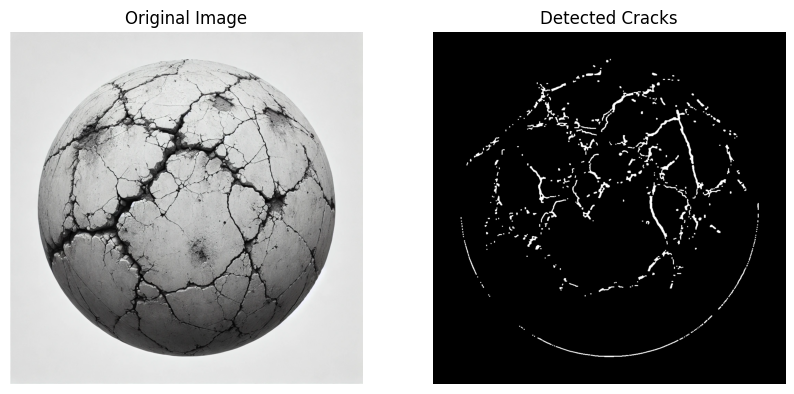

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/Users/sivaprasanth/Documents/Computer Vision/Computer-Vision/img/cracked_ball.webp', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to smooth the image
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Compute gradients using Sobel operators
sobelx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=5)

# Compute the gradient magnitude and normalize it
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
gradient_magnitude = np.uint8(gradient_magnitude)

# Thresholding to extract high-gradient areas (potential cracks)
_, cracks = cv2.threshold(gradient_magnitude, 100, 255, cv2.THRESH_BINARY)

# Create a mask to exclude the outer boundary
h, w = cracks.shape
center = (w // 2, h // 2)
radius = min(center[0], center[1]) - 15  # Subtract to stay inside the sphere boundary
mask = np.zeros_like(cracks)
cv2.circle(mask, center, radius, 255, thickness=-1)

# Apply the mask to the cracks
cracks_masked = cv2.bitwise_and(cracks, mask)

# Additional morphological operations to refine cracks
kernel = np.ones((3, 3), np.uint8)
cracks_refined = cv2.morphologyEx(cracks_masked, cv2.MORPH_CLOSE, kernel)
cracks_refined = cv2.morphologyEx(cracks_refined, cv2.MORPH_OPEN, kernel)

# Display the results
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
img_color = cv2.imread('/Users/sivaprasanth/Documents/Computer Vision/Computer-Vision/img/cracked_ball.webp')
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Detected Cracks")
plt.imshow(cracks_refined, cmap='gray')
plt.axis('off')

plt.show()